# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importing the data

In [2]:
dataset = pd.read_csv("AviationData.csv", encoding='ISO-8859-1')


C:\Users\HP\AppData\Local\Temp\ipykernel_15236\3476815171.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("AviationData.csv", encoding='ISO-8859-1')


# Selecting columns to keep

In [3]:
columns_to_keep = ['Broad.phase.of.flight','Total.Uninjured','Total.Minor.Injuries','Total.Serious.Injuries','Total.Fatal.Injuries','Purpose.of.flight','Make','Aircraft.Category','Aircraft.damage','Injury.Severity']
dataset = dataset[columns_to_keep]

# Clearing null values

In [4]:
dataset = dataset.dropna()

# Descriptive statistics

In [5]:
dataset.describe()

,Total.Uninjured,Total.Minor.Injuries,Total.Serious.Injuries,Total.Fatal.Injuries
count,3604.000000,3604.000000,3604.000000,3604.000000
mean,1.907325,0.274140,0.198946,0.401221
std,10.473379,1.081619,0.644875,1.100530
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,0.000000
max,393.000000,33.000000,10.000000,27.000000


# Aircracft category vs Aircraft damage

In [6]:
table1=pd.crosstab(dataset['Aircraft.Category'],dataset['Aircraft.damage'])
print(table1)

Aircraft.damage    Destroyed  Minor  Substantial
Aircraft.Category                               
Airplane                 931    111         2150
Balloon                    4      5           14
Glider                    13      1           39
Gyrocraft                  9      0            7
Helicopter               103      7          208
Ultralight                 1      0            0
Unknown                    1      0            0


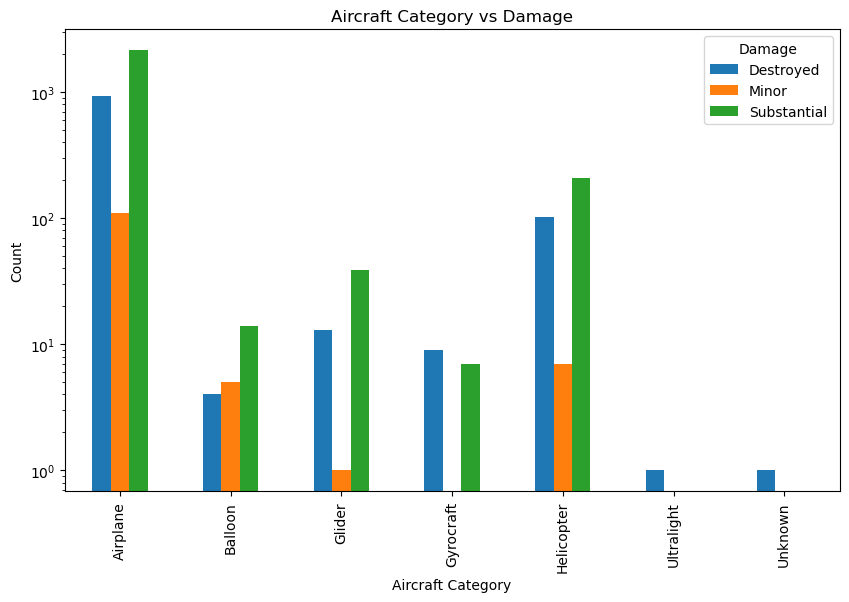

In [7]:
table1.plot(kind='bar', figsize=(10, 6))
plt.title('Aircraft Category vs Damage')
plt.ylabel('Count')
plt.xlabel('Aircraft Category')
plt.legend(title='Damage')
plt.yscale('log') 
plt.show()


# Interpretation here
The graph above shows damage spectrum across various categories of aircraft, a comparison I find necessary to inform on what amountb of risk you will take on when choosing what aircraft you want to invest in

# Broad.phase of flight vs Injury.Severity

In [8]:
table2 = pd.crosstab(dataset['Broad.phase.of.flight'],dataset['Injury.Severity'])
table2

Injury.Severity,Fatal(1),Fatal(12),Fatal(2),Fatal(27),Fatal(3),Fatal(4),Fatal(5),Fatal(6),Fatal(7),Fatal(8),Incident,Non-Fatal
Broad.phase.of.flight,,,,,,,,,,,,
Approach,45,0,26,0,9,6,2,1,1,2,13,289
Climb,9,0,8,0,6,2,3,1,0,0,5,58
Cruise,66,0,66,0,35,26,1,6,2,2,16,400
Descent,14,0,5,0,4,1,0,0,0,0,4,69
Go-around,4,0,3,0,1,3,2,0,0,0,2,42
Landing,10,0,5,0,0,2,0,0,0,0,19,897
Maneuvering,92,0,48,0,16,2,2,1,0,1,5,266
Other,1,0,3,0,2,0,0,0,0,0,1,5
Standing,4,0,0,0,0,0,0,0,0,0,1,20


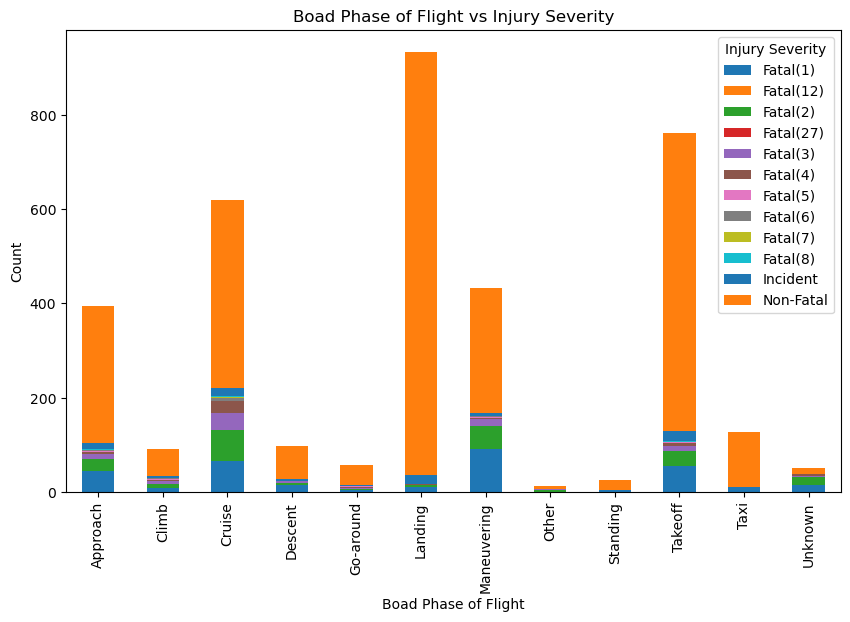

In [9]:
table2.plot(kind='bar', stacked=True,figsize=(10, 6))
plt.title('Boad Phase of Flight vs Injury Severity')
plt.ylabel('Count')
plt.xlabel('Boad Phase of Flight')
plt.legend(title='Injury Severity')
plt.show()

# Interpretation here
A close look at the plot above shows the various stages during a flight and how  severe an incident will be during each


# Total Fatal Injuries vs Make

In [10]:
table3 = dataset.groupby('Make')['Total.Fatal.Injuries'].mean().sort_values(ascending=False).reset_index()
table3

,Make,Total.Fatal.Injuries
0,Fokker,9.000000
1,Robertson,7.666667
2,American Yankee,6.000000
3,Corben,3.000000
4,Mbb-bolkow,3.000000
...,...,...
307,Bennet,0.000000
308,Bellance,0.000000
309,Lark (i.c.a.),0.000000
310,Lawson Special,0.000000


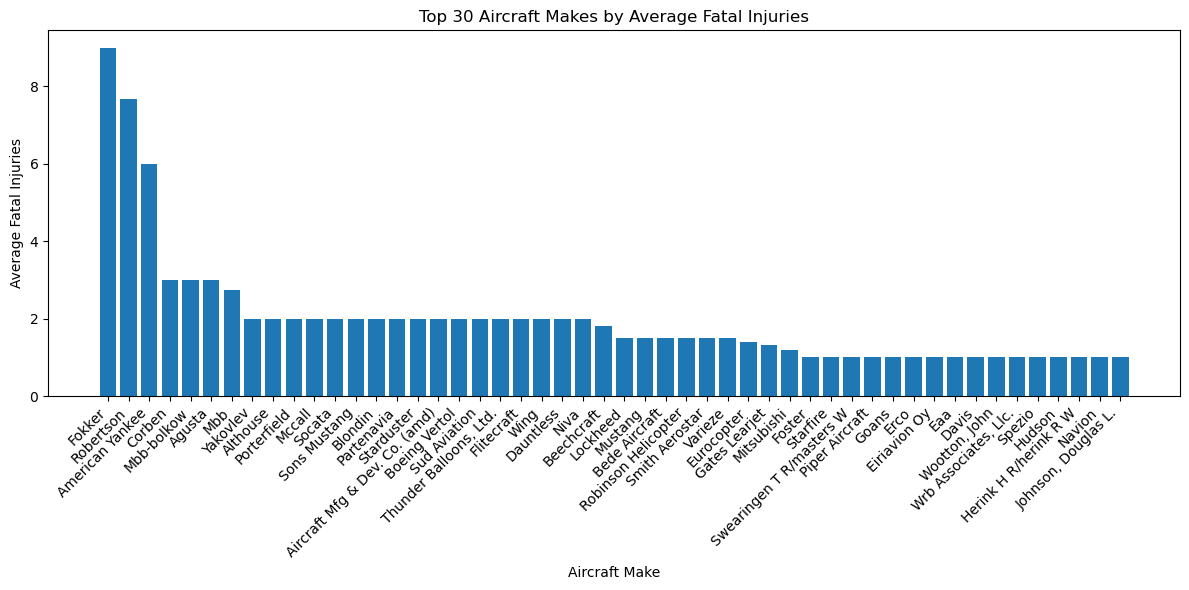

In [11]:
top30 = table3.head(50)
plt.figure(figsize=(12, 6))
plt.bar(top30['Make'], top30['Total.Fatal.Injuries'])
plt.title('Top 30 Aircraft Makes by Average Fatal Injuries')
plt.xlabel('Aircraft Make')
plt.ylabel('Average Fatal Injuries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation here
From this we can comfortably recommend what make of aircraft a client should avoid by seeing that which poses the greatest risk of probable fatal injuries 


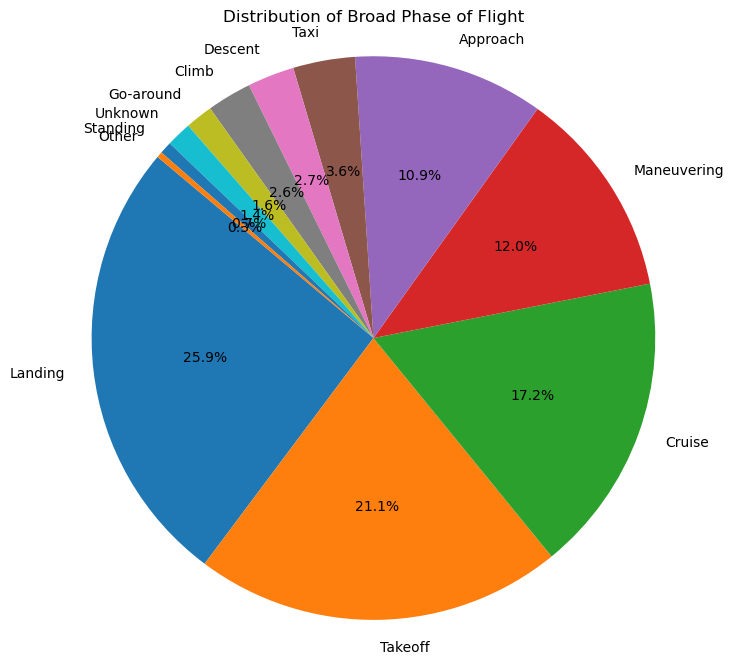

In [12]:
table4 = dataset['Broad.phase.of.flight'].value_counts()

# Plot
plt.figure(figsize=(8, 8))
plt.pie(table4, labels=table4.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Broad Phase of Flight')
plt.axis('equal')
plt.show()

# Interpretation here
The piechart informs on the risk factor taken on during the various stages of a flight and may inform pilots on when they should pay extra attention to their specific vessel.
